In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns

# Define start and end dates for all 3 years
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-12-31')

# Create a date range for all days within the 3 years
date_range = pd.date_range(start_date, end_date)



# Define a function to generate random sales data (you can adjust the logic)
def generate_sales(date):
 
  return np.random.randint(1, 1000)

# Create an empty DataFrame with 'sales_date' and 'Qty' columns
df = pd.DataFrame({'sales_date': date_range})

# Add a 'Qty' column with random sales data for each date
df['Qty'] = df['sales_date'].apply(generate_sales)




# Print the resulting DataFrame with dummy data for all 3 years
print(df)

#df.to_csv('item_code_1017.csv')

# df['Qty'].plot()





     sales_date  Qty
0    2021-01-01  419
1    2021-01-02  995
2    2021-01-03  911
3    2021-01-04  429
4    2021-01-05  880
...         ...  ...
1090 2023-12-27  575
1091 2023-12-28  358
1092 2023-12-29  465
1093 2023-12-30  400
1094 2023-12-31   61

[1095 rows x 2 columns]


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   sales_date  1095 non-null   datetime64[ns]
 1   Qty         1095 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.2 KB


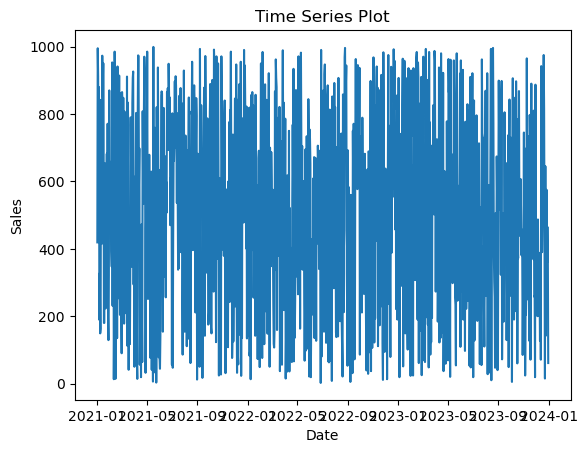

In [3]:
# Check for Trend
plt.plot(df['sales_date'], df['Qty'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Plot')
plt.show()  # Visual inspection of trend

<AxesSubplot:xlabel='sales_date'>

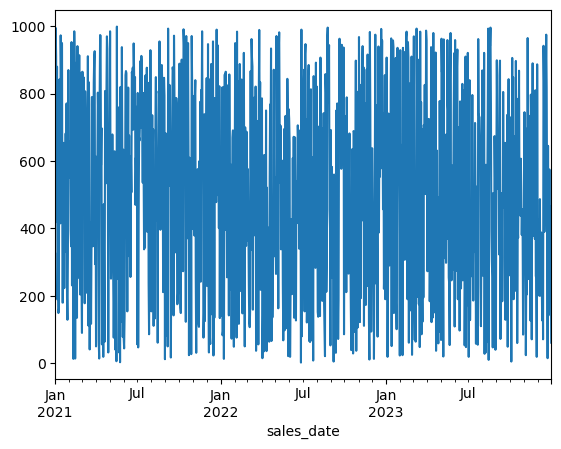

In [4]:
df.index = df['sales_date']

df['Qty'].plot()

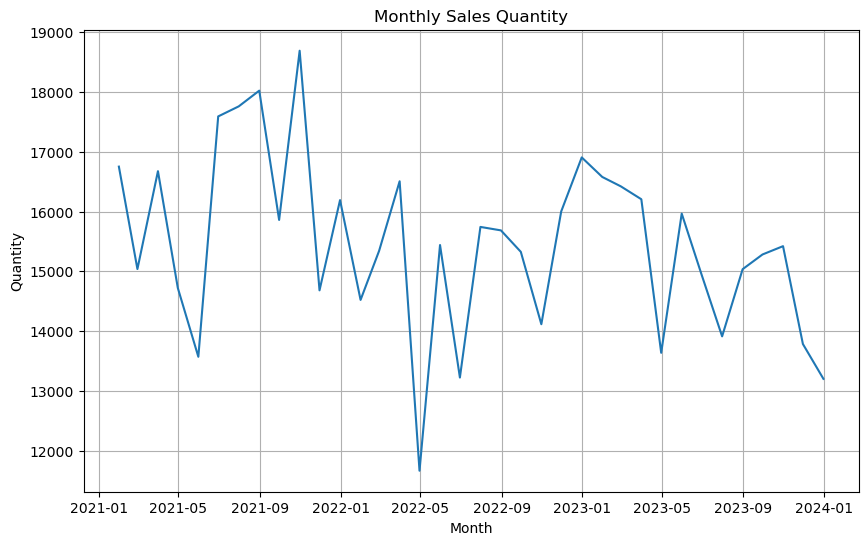

In [5]:
# Resample the DataFrame at monthly frequency and sum the quantities for each month
monthly_data = df.resample('M', on='sales_date').sum()

# Plot the monthly quantity data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Qty'])
plt.title('Monthly Sales Quantity')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2021-01-01 to 2023-12-31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   sales_date  1095 non-null   datetime64[ns]
 1   Qty         1095 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 25.7 KB


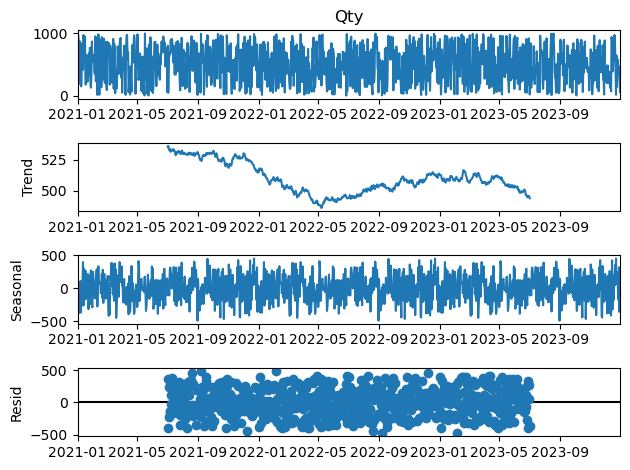

In [7]:
result = seasonal_decompose(df['Qty'], model='additive',period = 365)
result.plot()
plt.show()

In [8]:
df_year  = df.resample('A', on = 'sales_date')


sales_date
2021-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
2022-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
2023-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
Freq: A-DEC, Name: Qty, dtype: object

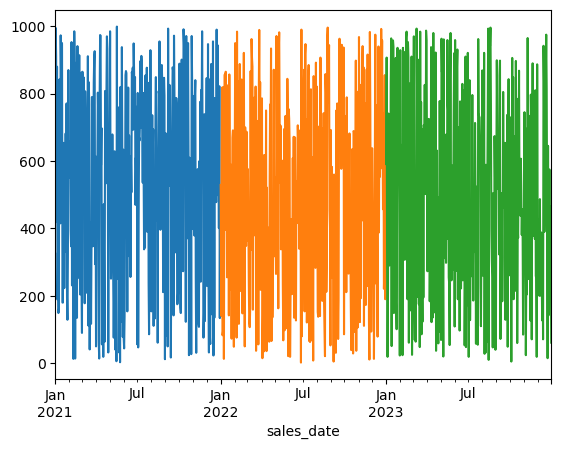

In [9]:

df_year['Qty'].plot()

In [10]:
import datetime as dt
df['Year'] = df['sales_date'].dt.year
df.head()


,sales_date,Qty,Year
sales_date,,,
2021-01-01,2021-01-01,419,2021
2021-01-02,2021-01-02,995,2021
2021-01-03,2021-01-03,911,2021
2021-01-04,2021-01-04,429,2021
2021-01-05,2021-01-05,880,2021


In [11]:
z_score = np.abs((df['Qty'] - df['Qty'].mean()) / df['Qty'].std())
print(z_score)


sales_date
2021-01-01    0.307370
2021-01-02    1.679271
2021-01-03    1.389553
2021-01-04    0.272880
2021-01-05    1.282633
                ...   
2023-12-27    0.230679
2023-12-28    0.517761
2023-12-29    0.148715
2023-12-30    0.372902
2023-12-31    1.542123
Name: Qty, Length: 1095, dtype: float64


In [12]:
from statsmodels.tsa.arima.model import ARIMA
# Train the ARIMA model
def train_arima_model(data):
    # Define parameters for ARIMA model (p, d, q)
    p, d, q = 28, 0,0
    # Fit ARIMA model to data
    model = ARIMA(data, order=(p, d, q))
    fitted_model = model.fit()
    return fitted_model

    

In [26]:
## Train Sarima Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
def fit_sarima_model(data):
    # Define SARIMA model parameters
    order = (1, 1, 1)  # (p, d, q)
    seasonal_order = (1, 1, 1, 12)  # (P, D, Q, seasonal_period)
    
    # Fit SARIMA model to data
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False)
    fitted_model_sarima = model.fit()
    return fitted_model_sarima

In [14]:
## Train Exponential Smoothing model


In [15]:
def forecast_quantity(start_date, end_date, forecast_horizon):
    # Filter historical sales data for the selected item and date range
    item_sales_data = df[(df['sales_date'] >= start_date) & 
                            (df['sales_date']  <= end_date)]
    # Train the ARIMA model using filtered sales data
    item_model = train_arima_model(item_sales_data['Qty'])
    # Forecast using the trained model
    forecast = item_model.forecast(steps=forecast_horizon)   
    
    return forecast

In [16]:
def forecast_quantity_sarima(start_date, end_date, forecast_horizon):
    # Filter historical sales data for the selected item and date range
    item_sales_data = df[(df['sales_date'] >= start_date) & 
                            (df['sales_date']  <= end_date)]
    # Train the SARIMA model using filtered sales data
    item_model_sarimax = fit_sarima_model(item_sales_data['Qty'])
    # Forecast using the trained model
    forecast_sarimax = item_model_sarimax.forecast(steps=forecast_horizon)
    return forecast_sarimax

In [22]:
def forecast_endpoint():
#     item_id = request.json['item_id']
#     start_date = request.json['start_date']
#     end_date = request.json['end_date']
#     forecast_horizon = request.json['forecast_horizon']
    start_date = '2023-01-01'
    end_date = '2023-01-31'
    forecast_horizon = 28
    
    # Call forecast_quantity function with user inputs
    forecast = forecast_quantity(start_date, end_date, forecast_horizon)
    
    
    # Return forecasted quantity to frontend
    #return jsonify({'forecast': forecast})
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    actual_values = np.array([207,908,636,298,768,73,979,238,276,356,671,886,837,944,174,100,200,24,347,180,545,406,419,852,463,683,523,768])
    mae = mean_absolute_error(actual_values, forecast)
    mse = mean_squared_error(actual_values, forecast)
    rmse = np.sqrt(mse) 
    
   
    print(forecast)
    print("mae-----",mae)
    print("mse--------",mse)
    print("rmse--------",rmse)

In [23]:
forecast_endpoint()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-02-01     741.943034
2023-02-02    1448.205537
2023-02-03     455.659428
2023-02-04     702.988369
2023-02-05     179.725912
2023-02-06    -440.639132
2023-02-07    1005.101091
2023-02-08     973.820774
2023-02-09     795.617846
2023-02-10    -210.195682
2023-02-11    -334.153593
2023-02-12     496.916948
2023-02-13    1061.079360
2023-02-14    1327.795071
2023-02-15     619.235761
2023-02-16    -313.010114
2023-02-17      26.496637
2023-02-18     589.904125
2023-02-19     937.634508
2023-02-20    1067.629484
2023-02-21     794.969350
2023-02-22    -522.175301
2023-02-23      41.336183
2023-02-24      86.711763
2023-02-25    1056.129046
2023-02-26    1205.837894
2023-02-27     115.460444
2023-02-28      69.645910
Freq: D, Name: predicted_mean, dtype: float64
mae----- 508.2539945338096
mse-------- 309409.8631827625
rmse-------- 556.2462253200129


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
def forecast_endpoint_sarima():
#     item_id = request.json['item_id']
#     start_date = request.json['start_date']
#     end_date = request.json['end_date']
#     forecast_horizon = request.json['forecast_horizon']
    start_date = '2022-01-01'
    end_date = '2023-01-31'
    forecast_horizon = 1
    
    # Call forecast_quantity function with user inputs
    forecast_sarimax = forecast_quantity_sarima(start_date, end_date, forecast_horizon)
    
    
    # Return forecasted quantity to frontend
    #return jsonify({'forecast': forecast})
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    #actual_values = np.array([207,908,636,298,768,73,979,238,276,356,671,886,837,944,174,100,200,24,347,180,545,406,419,852,463,683,523,768])
    actual_values = np.array([207])

    mae = mean_absolute_error(actual_values, forecast_sarimax)
    mse = mean_squared_error(actual_values, forecast_sarimax)
    rmse = np.sqrt(mse) 
    
   
    print(forecast_sarimax)
    print("mae-----",mae)
    print("mse--------",mse)
    print("rmse--------",rmse)
    



In [27]:
forecast_endpoint_sarima()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-02-01    552.424285
Freq: D, dtype: float64
mae----- 345.424284618941
mse-------- 119317.93640450716
rmse-------- 345.424284618941


In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Exponential smoothing model
def fit_exponential_smoothing_model(data):
    # Fit Exponential Smoothing model to data
    model = ExponentialSmoothing(data, seasonal='additive', seasonal_periods=12)
    fitted_model = model.fit()
    return fitted_model



In [29]:
def forecast_quantity_Exponential_Smoothing(start_date, end_date, forecast_horizon):
    # Filter historical sales data for the selected item and date range
    item_sales_data = df[(df['sales_date'] >= start_date) & 
                            (df['sales_date']  <= end_date)]
    # Train the SARIMA model using filtered sales data
    item_model_Exponential_Smoothing = fit_exponential_smoothing_model(item_sales_data['Qty'])
    # Forecast using the trained model
    forecast_Exponential_Smoothing = item_model_Exponential_Smoothing.forecast(steps=forecast_horizon)
    return forecast_Exponential_Smoothing

In [31]:
def forecast_endpoint_Exponential_Smoothing():
#     item_id = request.json['item_id']
#     start_date = request.json['start_date']
#     end_date = request.json['end_date']
#     forecast_horizon = request.json['forecast_horizon']
    start_date = '2022-01-01'
    end_date = '2023-01-31'
    forecast_horizon = 1
    
    # Call forecast_quantity function with user inputs
    forecast_Exponential_Smoothing = forecast_quantity_Exponential_Smoothing(start_date, end_date, forecast_horizon)
    
    
    # Return forecasted quantity to frontend
    #return jsonify({'forecast': forecast})
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    #actual_values = np.array([207,908,636,298,768,73,979,238,276,356,671,886,837,944,174,100,200,24,347,180,545,406,419,852,463,683,523,768])
    actual_values = np.array([207])

    mae = mean_absolute_error(actual_values, forecast_Exponential_Smoothing)
    mse = mean_squared_error(actual_values, forecast_Exponential_Smoothing)
    rmse = np.sqrt(mse) 
    
   
    print(forecast_Exponential_Smoothing)
    print("mae-----",mae)
    print("mse--------",mse)
    print("rmse--------",rmse)
    



In [32]:
forecast_endpoint_Exponential_Smoothing()

2023-02-01    517.909403
Freq: D, dtype: float64
mae----- 310.9094027839027
mse-------- 96664.65673944305
rmse-------- 310.9094027839027


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
